### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### Load Dataset

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Data Preprocesing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.shape

(1025, 14)

### Data visalisation and EDA

<Axes: xlabel='sex', ylabel='count'>

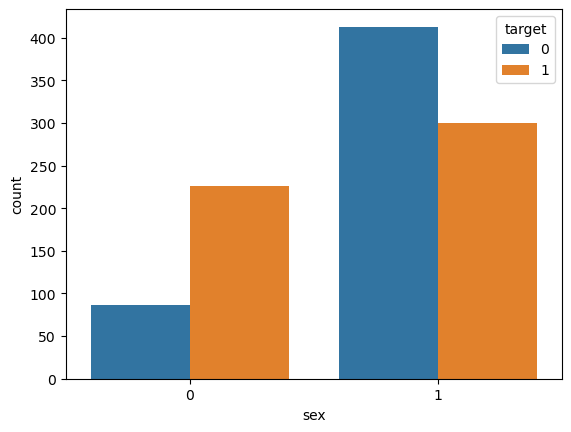

In [7]:
sns.countplot(x='sex',data=df,hue='target')

<Axes: >

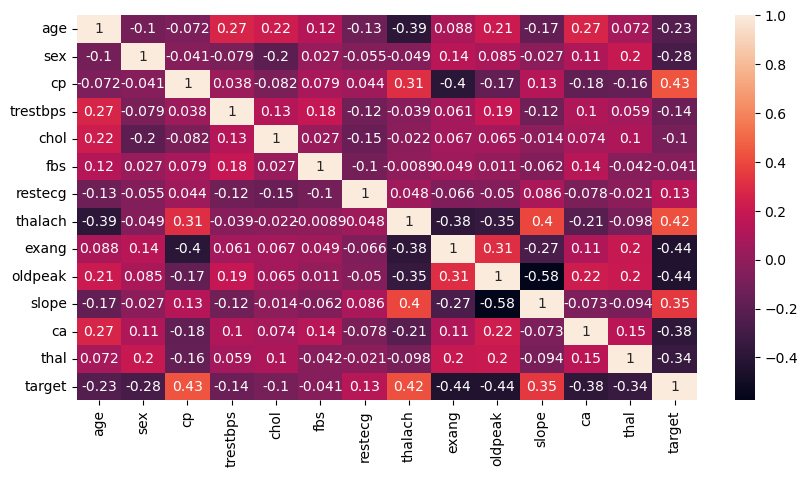

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='age', ylabel='Count'>

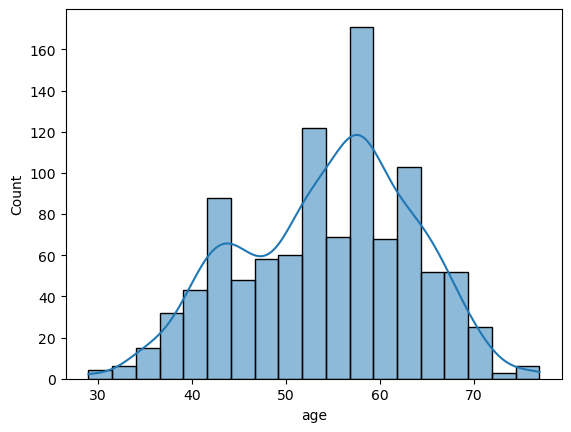

In [11]:
sns.histplot(df['age'],kde=True)

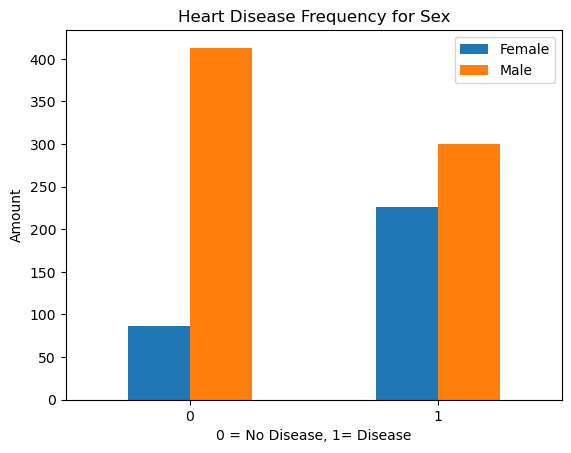

In [30]:
pd.crosstab(df.target, df.sex).plot(kind="bar")
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)
plt.show()

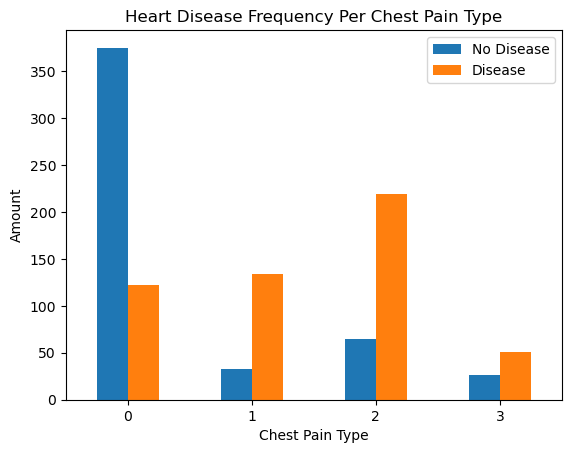

In [31]:
# Make the crosstab more visual 
pd.crosstab(df.cp,df.target).plot(kind="bar")

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

### Train test split

In [23]:
x = df.drop(columns = ['target'])
y = df['target']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

### model selction

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [43]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Logistic Regression Accuracy: 0.79
Random Forest Accuracy: 0.99
SVM Accuracy: 0.68
KNN Accuracy: 0.73


### So final model is Random Forest Accuracy

In [45]:
final_model = RandomForestClassifier(n_estimators=100)
final_model.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
pred = final_model.predict(X_test)
accuracy_score(y_test,pred)

0.9853658536585366

### Model Evaluation

In [49]:
from sklearn.metrics import confusion_matrix,classification_report

<Axes: >

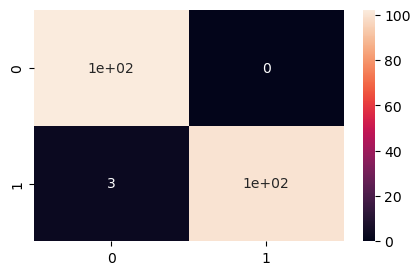

In [58]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [52]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Save the model

In [59]:
pickle.dump(final_model, open("heart_disease_model.pkl", "wb"))